In [1]:
import json
from pathlib import Path

import matplotlib.pyplot as plt

In [2]:
def get_num_circles(data):
    return data["stats"][-1]["squaresPerCircleConservative"].get("1", 0)


scenes = {
    path.stem: json.loads(path.read_text()) for path in Path("render/stats").iterdir()
}
scenes = {k: v for k, v in sorted(scenes.items(), key=lambda item: get_num_circles(item[1]))}

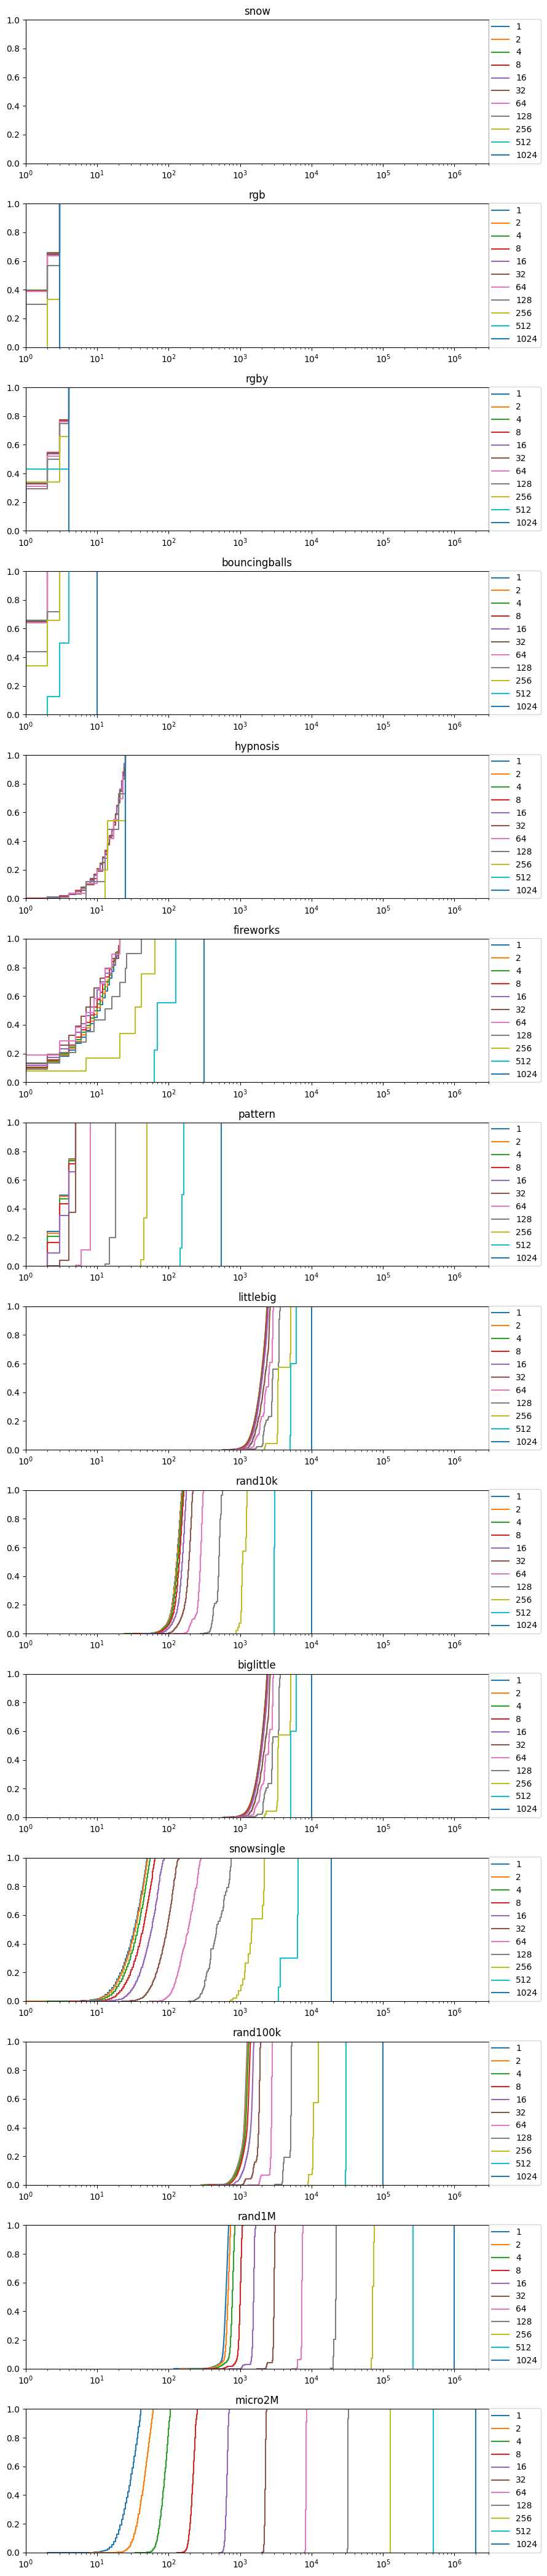

In [3]:
fig, axs = plt.subplots(len(scenes), figsize=(9, 3 * len(scenes)), tight_layout=True)
for i, (name, data) in enumerate(scenes.items()):
    ax = axs[i]
    ax.set_title(name)
    ax.set_xscale("log")
    ax.set_xlim([1, 3 * 10**6])
    for entry in data["stats"]:
        size = entry["size"]
        num_squares = (1024**2) / (size**2)
        hist = entry["circlesPerSquareConservative"]
        x = [int(key) for key in hist.keys()]
        total = 0
        y = []
        for n in hist.values():
            total += n
            y.append(total / num_squares)
        ax.ecdf(x, y, label=size)
    ax.legend(loc=(1, 0))